<a href="https://colab.research.google.com/github/SumanSDey/Solving-Business-Problems/blob/Customer-Segmentation-using-synthetic-data/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation for targetted marketing strategy building

## Importing necessary python libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/segmentation_preprocessed.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [5]:
# Loading the dataset to pandas data frame
filepath = '/content/drive/MyDrive/segmentation_preprocessed.csv'

data_frame = pd.read_csv(filepath)
data_frame.head()


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


## Data Preprocessing

In [6]:

# Load the data
data_frame = pd.read_csv(filepath)

# Check for missing values
print(data_frame.isnull().sum())


ID                    0
Gender                0
Ever_Married        266
Age                   0
Graduated           155
Profession          244
Work_Experience    1663
Spending_Score        0
Family_Size           0
Var_1               156
Segmentation          0
dtype: int64


In [7]:
#Fill the missing value

data_frame['Ever_Married'].fillna(data_frame['Ever_Married'].mode()[0], inplace=True)
data_frame['Graduated'].fillna(data_frame['Graduated'].mode()[0], inplace=True)
data_frame['Profession'].fillna('Unknown', inplace=True)
data_frame['Work_Experience'].fillna(0, inplace=True)
data_frame['Family_Size'].fillna(data_frame['Family_Size'].median(), inplace=True)
data_frame['Var_1'].fillna(data_frame['Var_1'].mode()[0], inplace=True)

# Check the data types of each column
print(data_frame.dtypes)


ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object


In [8]:
# Confirmation so that no missing values exists
print(data_frame.isnull().sum())

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64


                  ID           Age  Work_Experience   Family_Size
count   16136.000000  16136.000000     16136.000000  16136.000000
mean   463482.213498     43.344819         2.426934      2.891609
std      2598.723220     16.206981         3.339037      1.511805
min    458982.000000     18.000000         0.000000      1.000000
25%    461222.750000     31.000000         0.000000      2.000000
50%    463500.500000     41.000000         1.000000      3.000000
75%    465739.000000     52.000000         4.000000      4.000000
max    467974.000000     89.000000        14.000000      9.000000
Axes(0.125,0.11;0.775x0.77)


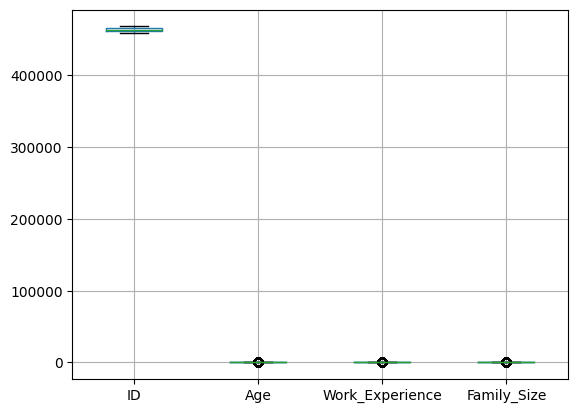

In [9]:
# Statistical insights

print(data_frame.describe())

# Check for outliers
print(data_frame.boxplot())


In [10]:
# Feature Encoding
# Machine learning algorithms require numerical inputs, so you need to encode categorical features
# like 'Gender,' 'Ever_Married,' 'Graduated,' 'Profession,' 'Spending_Score,' and 'Var_1.'
# Perform one-hot encoding
data_encoded = pd.get_dummies(data_frame, columns=['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1'])

# Drop the 'ID' column as it's not needed for segmentation
data_encoded.drop('ID', axis=1, inplace=True)

# Check the updated data
print(data_encoded.head())



   Age  Work_Experience  Family_Size Segmentation  Gender_Female  Gender_Male  \
0   22              1.0          4.0            D          False         True   
1   38              0.0          3.0            A           True        False   
2   67              1.0          1.0            B           True        False   
3   67              0.0          2.0            B          False         True   
4   40              0.0          6.0            A           True        False   

   Ever_Married_No  Ever_Married_Yes  Graduated_No  Graduated_Yes  ...  \
0             True             False          True          False  ...   
1            False              True         False           True  ...   
2            False              True         False           True  ...   
3            False              True         False           True  ...   
4            False              True         False           True  ...   

   Spending_Score_Average  Spending_Score_High  Spending_Score_Low  

In [11]:
# Scalling Features
# To ensure that features with different scales do not bias the segmentation, it's a good practice to scale numerical features:

from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
num_cols = ['Age', 'Work_Experience', 'Family_Size']
data_encoded[num_cols] = scaler.fit_transform(data_encoded[num_cols])

# Check the updated data
print(data_encoded.head())




        Age  Work_Experience  Family_Size Segmentation  Gender_Female  \
0 -1.317055        -0.427362     0.733180            D          False   
1 -0.329795        -0.726859     0.071699            A           True   
2  1.459613        -0.427362    -1.251264            B           True   
3  1.459613        -0.726859    -0.589783            B          False   
4 -0.206388        -0.726859     2.056143            A           True   

   Gender_Male  Ever_Married_No  Ever_Married_Yes  Graduated_No  \
0         True             True             False          True   
1        False            False              True         False   
2        False            False              True         False   
3         True            False              True         False   
4        False            False              True         False   

   Graduated_Yes  ...  Spending_Score_Average  Spending_Score_High  \
0          False  ...                   False                False   
1           True  

### Age of Homemaker vs their Spending score

Text(0, 0.5, 'Spending Score')

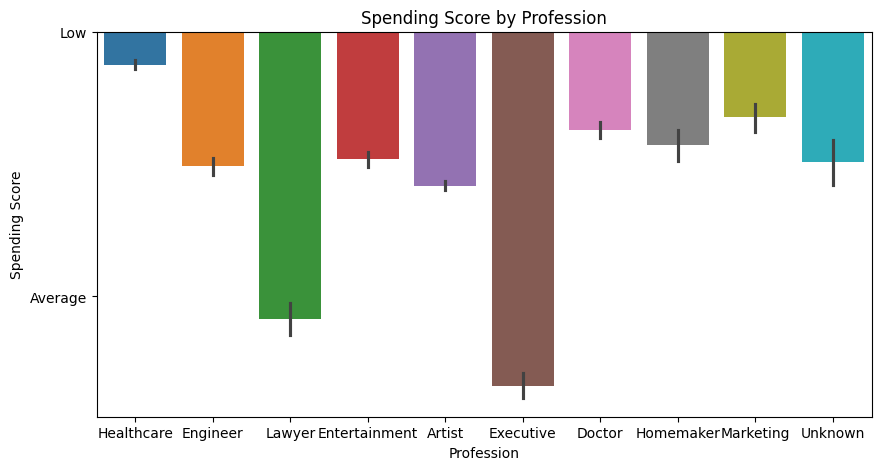

In [17]:
# prompt: Generate a code to plot two bar plots side by side. plot 1: y axis = Spending_score, x axis = profession

import matplotlib.pyplot as plt
import seaborn as sns
# Plot 1: Spending Score vs Profession

plt.figure(figsize=(10, 5))  # Adjust figure size as needed

sns.barplot(x='Profession', y='Spending_Score', hue='Profession', data=data_frame)
plt.title('Spending Score by Profession')
plt.xlabel('Profession')
plt.ylabel('Spending Score')



In [13]:
# Customer Segmentation
# Now that the data is preprocessed, we can perform customer segmentation.
# K-Means clustering is a commonly used algorithm for this task. We'll need to choose the number of clusters (K) based on our business needs.
# For now, let's assume K=4, like the existing market segments.

from sklearn.cluster import KMeans

# ... (Assuming you have data_frame and data_encoded already defined)

# Select only numerical columns for clustering
numeric_data = data_encoded.select_dtypes(include=['number'])

# Fit K-Means clustering model
kmeans = KMeans(n_clusters=4, random_state=42)
data_encoded['Cluster'] = kmeans.fit_predict(numeric_data)  # Apply model to numerical data

# ... (Remaining code from your original snippet)




# Check the distribution of customers in each cluster
print(data_encoded['Cluster'].value_counts())

# Add the cluster labels back to the original data
data_frame['Cluster'] = data_encoded['Cluster']

# Exclude non-numeric columns from mean calculation
numeric_columns = ['Age', 'Work_Experience', 'Family_Size']  # Add other numeric columns if needed
segmented_data = data_frame.groupby('Cluster')[numeric_columns].mean()

print(segmented_data)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster
3    5489
0    3837
1    3559
2    3251
Name: count, dtype: int64
               Age  Work_Experience  Family_Size
Cluster                                         
0        35.640605         1.160542     4.860568
1        66.852768         0.862321     2.250351
2        37.848662         8.315288     2.546909
3        36.743305         0.839133     2.135179


##Cluster Analysis:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


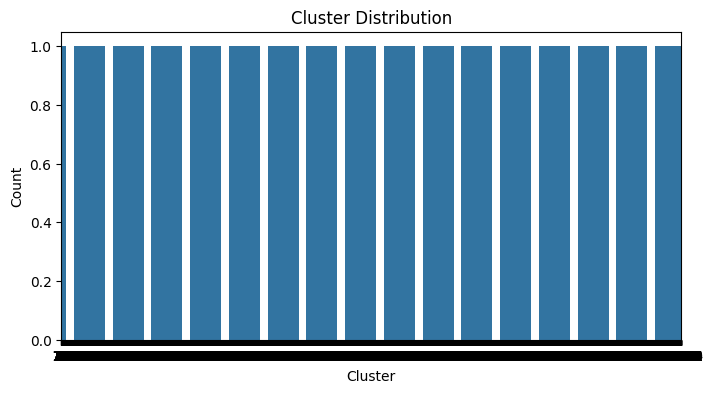

<ipython-input-14-711edd0d2e60>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=segmented_data.reset_index(), x='Cluster', y='Age', ci='sd')


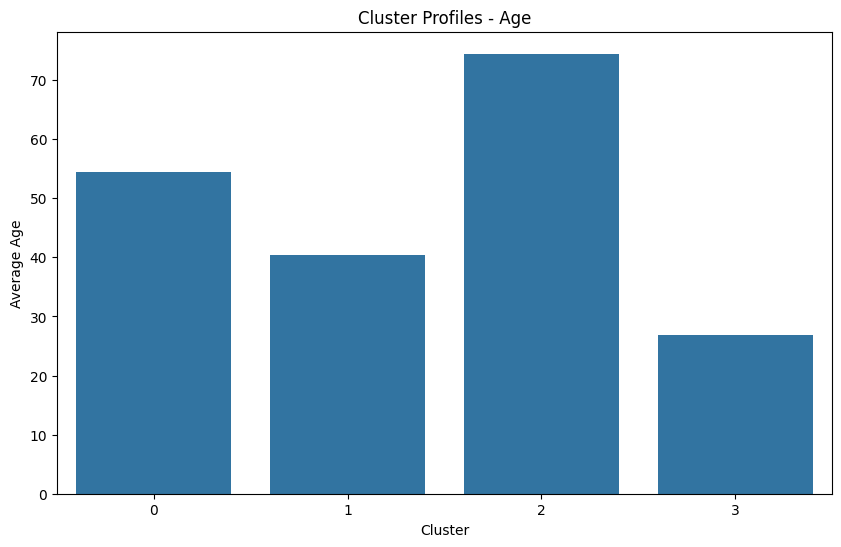

In [14]:

# Fit K-Means clustering model
kmeans = KMeans(n_clusters=4, random_state=42)
data_frame['Cluster'] = kmeans.fit_predict(data_frame[['Age', 'Work_Experience', 'Family_Size']])

# Bar plot for cluster distribution
plt.figure(figsize=(8, 4))
sns.countplot(data_frame['Cluster'])
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# Exclude categorical columns from clustering and mean calculation
numeric_columns = ['Age', 'Work_Experience', 'Family_Size']  # Add other numeric columns if needed
segmented_data = data_frame.groupby('Cluster')[numeric_columns].mean()

plt.figure(figsize=(10, 6))
sns.barplot(data=segmented_data.reset_index(), x='Cluster', y='Age', ci='sd')
plt.title('Cluster Profiles - Age')
plt.xlabel('Cluster')
plt.ylabel('Average Age')
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-15-310748c06c41>:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Cluster', y='Age', data=cluster_data, ci='sd')
<ipython-input-15-310748c06c41>:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Cluster', y='Work_Experience', data=cluster_data, ci='sd')
<ipython-input-15-310748c06c41>:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Cluster', y='Family_Size', data=cluster_data, ci='sd')


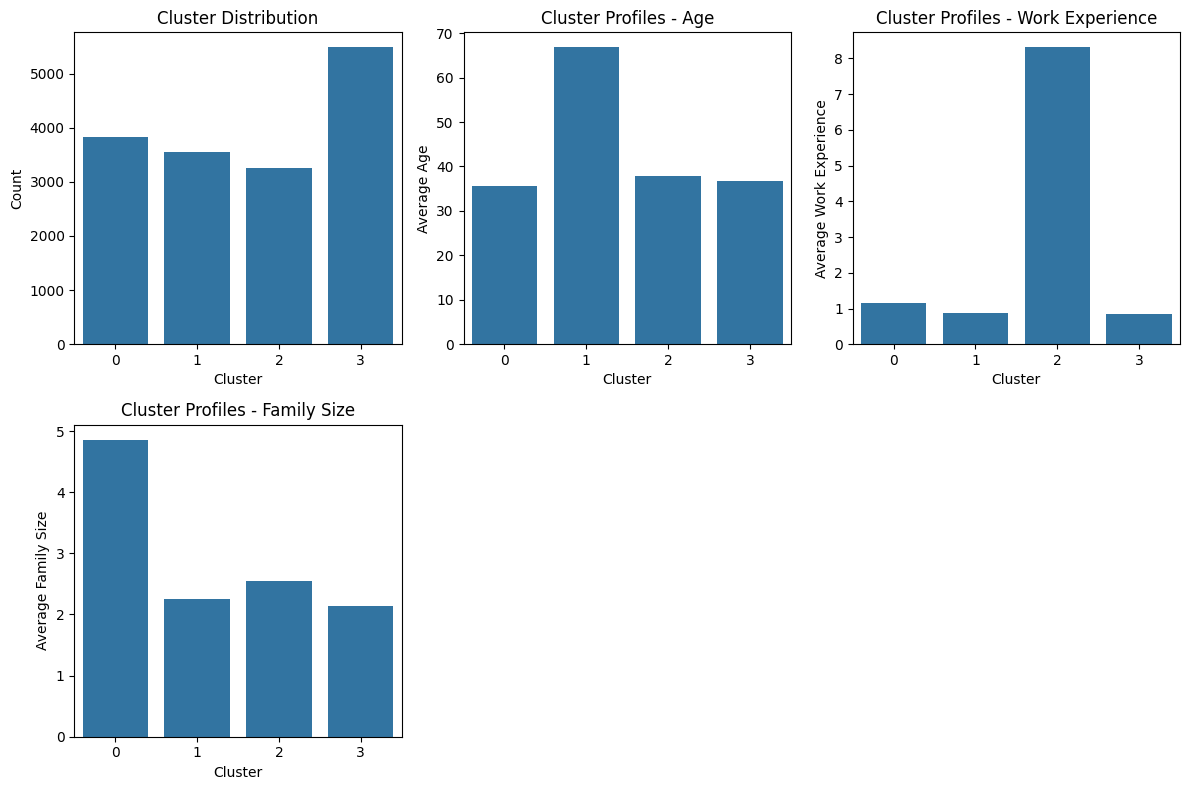

In [15]:
# prompt: In the above code, replace the name "sample_data" with "data_frame"

import matplotlib.pyplot as plt
# Fit K-Means clustering model (apply to the reduced data)
kmeans = KMeans(n_clusters=4, random_state=42)
data_frame['Cluster'] = kmeans.fit_predict(numeric_data)

# Combine calculations for visualizations (avoid redundant grouping)
cluster_data = data_frame.groupby('Cluster').agg({
  'Age': 'mean',
  'Work_Experience': 'mean',
  'Family_Size': 'mean',
  # Add other numeric columns with desired aggregations (e.g., std)
})

# Create visualizations using the pre-calculated data
plt.figure(figsize=(12, 8))  # Adjust figure size as needed

# Cluster Distribution
plt.subplot(2, 3, 1)  # Create a subplot in a 2x3 grid (first row, first column)
sns.countplot(x='Cluster', data=data_frame)
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')

# Cluster Profiles - Age
plt.subplot(2, 3, 2)  # Create a subplot (second row, first column)
sns.barplot(x='Cluster', y='Age', data=cluster_data, ci='sd')
plt.title('Cluster Profiles - Age')
plt.xlabel('Cluster')
plt.ylabel('Average Age')

# Cluster Profiles - Work Experience
plt.subplot(2, 3, 3)  # Create a subplot (second row, second column)
sns.barplot(x='Cluster', y='Work_Experience', data=cluster_data, ci='sd')
plt.title('Cluster Profiles - Work Experience')
plt.xlabel('Cluster')
plt.ylabel('Average Work Experience')

# Cluster Profiles - Family Size
plt.subplot(2, 3, 4)  # Create a subplot (second row, third column)
sns.barplot(x='Cluster', y='Family_Size', data=cluster_data, ci='sd')
plt.title('Cluster Profiles - Family Size')
plt.xlabel('Cluster')
plt.ylabel('Average Family Size')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


## Thanks for your time!